### Final Project: Digit Recognizer Competition
#### Team Members: Paula Palles, Aaron Amankwaah, Nikhil Pandey

Our goal is to go out of the scope of the class using the MNIST dataset. This is a simple digit dataset that we want to use to try many different classification models to benchmark them. Our goal is to use Neural Networks, SVMs, and K-Nearest Neighbor with different parameters to see how the parameters affect the final result.

For **K-Nearest Neighbors**, we will focus on the K-Neighbors parameter.

For **Support Vector Machines**...

For **Neural Networks**, we will focus on using sequential and convulation neural networks to compare them. We will also train our model with different amounts of hidden layers. For the scope of this project, we will use base-8 outputs (will be more aparent during the code). We will also look at runtime differences between GPU and CPU training. Finally, we will test how batch size and epoches affect the final result.

Our goal at the end of all the models is to be able to generate a through report of the models by comparing them and also integrating our models with a live canvas where users can input their own hand drawn numbers and immediately see the result from our models.

Dataset was obtained through Kaggle: https://www.kaggle.com/competitions/digit-recognizer


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
import torch

### Cleaning and Exploratory Data Analysis

Our goal is to get the data and verify its contents. Specifically we are looking to check for data types and nulls. We are also looking to visualize different aspects of the data with the goal of better understanding it. After that is done, we want to take the appropirate actions to clean and format the dataset to prepare it for our models.

In [74]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
test.columns.values 

array(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11',
       'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17',
       'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23',
       'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29',
       'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35',
       'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41',
       'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47',
       'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53',
       'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59',
       'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65',
       'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71',
       'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77',
       'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82',

In [77]:
# Gets types of first 5 columns
print("Training Types Head:", str(list(train.dtypes)[0:5]))
print("Testing Types Head:", str(list(train.dtypes)[0:5]))

Training Types Head: [dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]
Testing Types Head: [dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]


In [78]:
# Verifies all columns are integers
flag = True
for col in train.dtypes:
    if str(col) != 'int64':
        flag = False
print("All Training Columns are Integers: " + str(flag))

flag = True
for col in test.dtypes:
    if str(col) != 'int64':
        flag = False
print("All Testing Columns are Integers: " + str(flag))
        

All Training Columns are Integers: True
All Testing Columns are Integers: True


In [79]:
# Makes sure there are no nulls
print("Total Training Nulls:", train.isna().sum().sum())
print("Total Test Nulls:", train.isna().sum().sum())

Total Training Nulls: 0
Total Test Nulls: 0


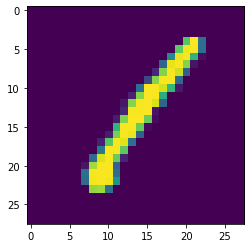

In [80]:
# Displays the first digit from the data
plt.imshow(train.iloc[0,1:].values.reshape(28,28))

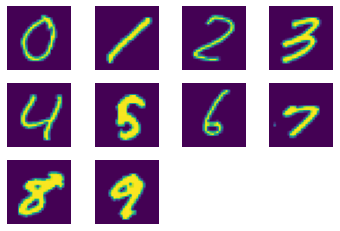

In [81]:
for i in range(10):
    digit_data = train[train.label == i]
    digit_data = digit_data.iloc[rand.randint(0, digit_data.shape[0]), 1:]
    plt.subplot(3, 4, i + 1)
    plt.imshow(digit_data.values.reshape(28, 28))
    plt.axis('off')

https://medium.com/analytics-vidhya/a-beginners-guide-to-knn-and-mnist-handwritten-digits-recognition-using-knn-from-scratch-df6fb982748a

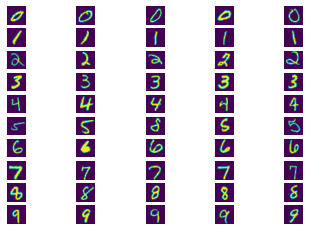

In [82]:
for i in range(10):
    digit_all_data = train[train.label == i]
    for j in range(5):
        digit_data = digit_all_data.iloc[rand.randint(0, digit_data.shape[0]), 1:]
        plt.subplot(10, 5, i * 5 + j + 1)
        plt.imshow(digit_data.values.reshape(28, 28))
        plt.axis("off")

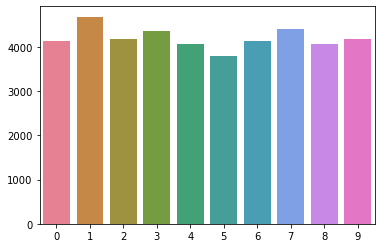

In [83]:
plot = sns.barplot(x=list(train.label.value_counts().index), y=list(train.label.value_counts().values), palette='husl')

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Prepare the training set

# X = feature values, all the columns except the last column
x = train_sample.iloc[:,train_sample.columns != "label"].values
# y = target values, last column of the data frame
y = train_sample[["label"]].values

#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Train the model
model = LogisticRegression()
model = model.fit(x_train, y_train) #Training the model

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
from random import sample
#take a 10 percent random sample of training data
train_sample = train.sample(frac=0.1, random_state=1)

In [93]:
from sklearn.neighbors import KNeighborsClassifier 

training_acc = []


xTotal_train = train_sample.iloc[:,train_sample.columns != "label"].values
yTotal_train = train_sample[["label"]].values
# the training dataset

#k nearest neighbor 
for k in range(5):
    model = KNeighborsClassifier(n_neighbors = k+1)

    model.fit(xTotal_train, yTotal_train)
    train_score = model.score(xTotal_train, yTotal_train)

    training_acc.append(train_score)



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

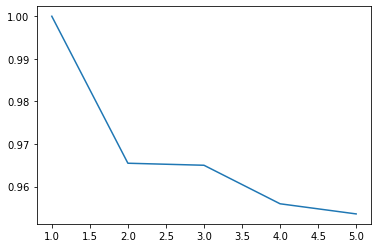

In [94]:
plt.plot([1,2,3,4,5], training_acc)

In [87]:
knearest = KNeighborsClassifier(n_neighbors=1)
knearest.fit(x_train, y_train)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [88]:
#Test the model
predictions = knearest.predict(x_test)

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        85
           1       0.96      1.00      0.98       107
           2       0.99      0.93      0.96        94
           3       0.92      0.91      0.91        85
           4       0.96      0.91      0.93        76
           5       0.88      0.93      0.90        75
           6       0.96      0.91      0.93        70
           7       0.88      0.93      0.90        86
           8       0.96      0.85      0.90        78
           9       0.86      0.93      0.89        84

    accuracy                           0.93       840
   macro avg       0.93      0.93      0.93       840
weighted avg       0.93      0.93      0.93       840

0.9285714285714286
